In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
import os
print("Connected to:", os.path.abspath('events.db'))

Connected to: /Users/jillcusick/Desktop/MLDS-400/ticketmaster-data-collection/src/analysis/events.db


In [3]:
#Connect to database
conn = sqlite3.connect('../../events.db')

#List tables in database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('venues',), ('artists',), ('events',), ('event_price_history',)]


**ARTISTS TABLE**

In [4]:
#View artists database table
artists = pd.read_sql('SELECT * FROM artists', conn)
artists.head()

,artist_id,artist_name
0,K8vZ917hjk7,Sylvie
1,K8vZ91713Gf,Widespread Panic
2,K8vZ9179Xc7,Sinatra Meets The Sopranos
3,K8vZ917jrdf,Vegyn
4,K8vZ9175sMf,Day Out with Thomas


In [5]:
len(artists)

3707

**EVENT PRICE HISTORY TABLE**

In [6]:
#View event_price_history database table
event_price_history = pd.read_sql('SELECT * FROM event_price_history', conn)
event_price_history.head()

,event_id,snapshot_date,min_price,max_price,currency
0,rZ7HnEZ1AfAbON,2025-11-03 00:00:00,199.00,199.00,USD
1,G5dVZbbwUsOXz,2025-11-03 00:00:00,NaN,NaN,None
2,ZFwVzcymWZ17keas,2025-11-03 00:00:00,NaN,NaN,None
3,rZ7HnEZ1Af_6QK,2025-11-03 00:00:00,49.51,49.51,USD
4,rZ7HnEZ1AfbKPK,2025-11-03 00:00:00,33.95,33.95,USD


In [8]:
len(event_price_history)

33222

**EVENTS TABLE**

In [9]:
#View events database table
events = pd.read_sql('SELECT * FROM events', conn)
events.head()

,event_id,name,url,type,locale,status,datetime,onsale_date,offsale_date,segment,genre,subgenre,family,artist_id,venue_id
0,rZ7HnEZ1AfAbON,Ticket for you + 1 for ALL 2025 shows!,https://www.ticketweb.com/event/ticket-for-you...,event,en-us,offsale,2025-01-09 08:00:00,2025-01-09 13:35:00,2025-02-01 05:55:00,Music,World,World,None,None,rZ7HnEZ178s4g
1,G5dVZbbwUsOXz,Abono Temporada NY Jazz All Stars 2025,https://www.ticketmaster.com.mx/abono-temporad...,event,en-us,onsale,2025-09-06 20:30:00,2025-02-17 19:00:00,2025-11-23 02:30:00,Music,Jazz,Jazz,None,None,KovZpZA6teaA
2,ZFwVzcymWZ17keas,SYLVIE (USA) IN RESIDENCE AT THE ELTHAM,https://www.moshtix.com.au/v2/event/sylvie-usa...,event,en-us,onsale,2025-10-25 19:00:00,2025-06-18 20:30:00,2025-11-08 05:00:00,Music,Rock,Indie Rock,None,K8vZ917hjk7,KovZ917Am63
3,rZ7HnEZ1Af_6QK,MOBWEEN 3 NIGHT PASS - Acid Mothers Temple (10...,https://www.ticketweb.com/event/mobween-3-nigh...,event,en-us,offsale,2025-10-30 20:00:00,2025-10-27 22:00:00,2025-10-31 01:00:00,Music,Alternative,Alternative Rock,None,K8vZ91713Gf,rZ7HnEZ1734-A
4,rZ7HnEZ1AfbKPK,"Vinyl Weekend Pass (4 Rooms, 8+ Artists)",https://www.ticketweb.com/event/vinyl-weekend-...,event,en-us,offsale,2025-10-31 22:00:00,2025-10-10 16:00:00,2025-11-02 07:00:00,Music,Other,None,None,None,rZ7HnEZ17qf40


In [10]:
len(events)

9302

**VENUES TABLE**

In [11]:
#View venues database table 
venues = pd.read_sql('SELECT * FROM venues', conn)
venues.head()

,venue_id,venue_name,city,state,country,lat,lon
0,rZ7HnEZ178s4g,Blue Moon Saloon,Lafayette,Louisiana,United States Of America,30.220444,-92.016281
1,KovZpZA6teaA,El Cantoral,Mexico,Ciudad de México,Mexico,19.361737,-99.166137
2,KovZ917Am63,Eltham Hotel,Eltham,New South Wales,Australia,-28.755979,153.393957
3,rZ7HnEZ1734-A,The Merry Widow,Mobile,Alabama,United States Of America,30.690695,-88.042412
4,rZ7HnEZ17qf40,Club Vinyl,Denver,Colorado,United States Of America,39.733550,-104.987060


In [12]:
len(venues)

2748

**Price distribution**

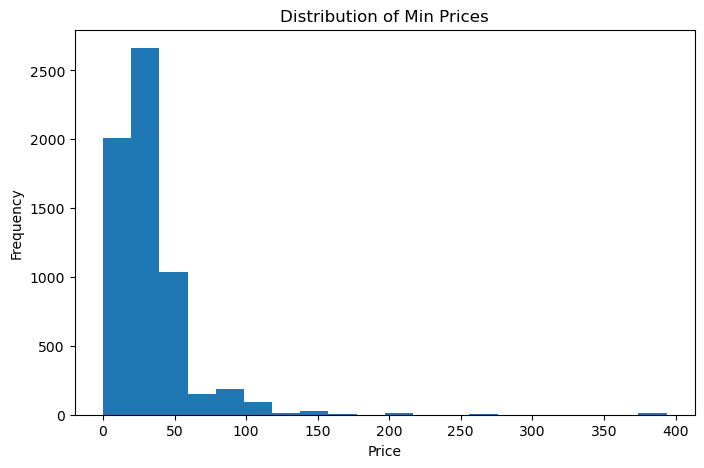

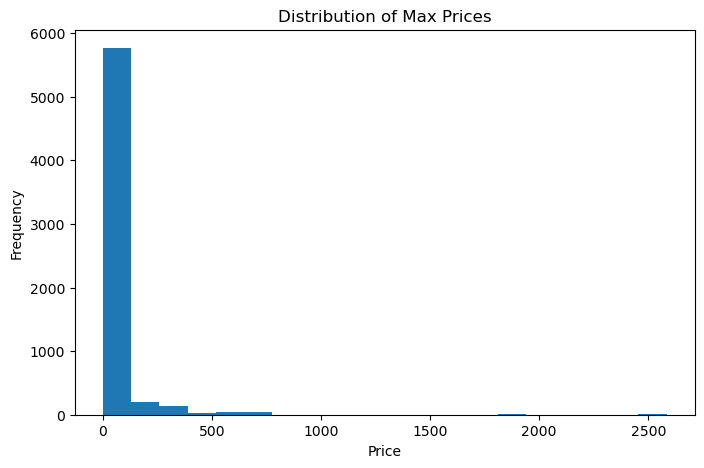

In [28]:
#Histograms of event min and max prices

event_price_history["min_price"].plot(kind="hist", bins=20, figsize=(8,5))
plt.title("Distribution of Min Prices")
plt.xlabel("Price")
plt.show()

event_price_history["max_price"].plot(kind="hist", bins=20, figsize=(8,5))
plt.title("Distribution of Max Prices")
plt.xlabel("Price")
plt.show()


**Events by location**

In [82]:
loc_events = pd.read_sql('''
    SELECT COUNT(DISTINCT e.event_id) AS event_count, v.lat, v.lon, v.city FROM events e
    JOIN venues v ON e.venue_id=v.venue_id 
    GROUP BY v.lat, v.lon, v.city
    ORDER BY event_count DESC
''', conn)

loc_events.head()

,event_count,lat,lon,city
0,107,40.759017,-73.989686,New York
1,65,-37.790975,144.911911,Flemington
2,63,51.538590,-0.143343,London
3,56,40.730940,-74.000650,New York
4,50,36.102916,-115.169756,Las Vegas


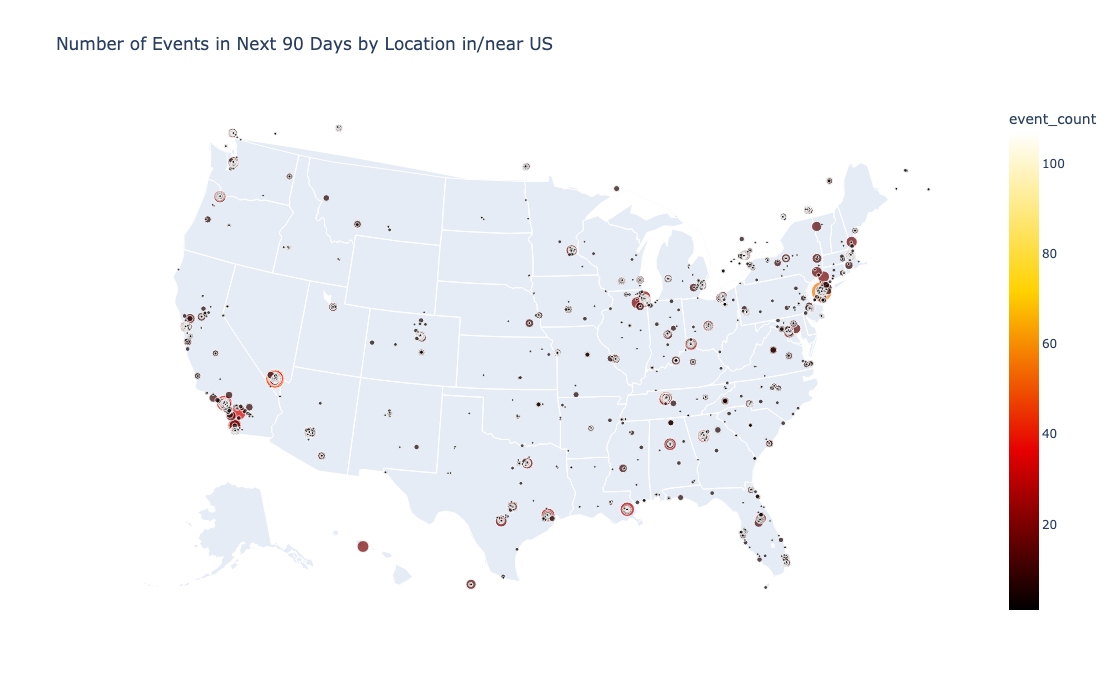

In [83]:
#Heat map of number of events in US

import plotly.express as px

loc_events_clean = loc_events.dropna(subset=["event_count"]) #drop nan values 

fig = px.scatter_geo(loc_events_clean,
                     lat="lat", lon="lon",
                     color="event_count", size="event_count",
                     scope="usa",
                     title="Number of Events in Next 90 Days by Location in/near US",
                     color_continuous_scale="Hot",
                     width=1000,
                     height=700,
                     hover_data={
                     "event_count":":.2f",  # 2 decimal places
                     "lat":":.2f",
                     "lon":":.2f"})

fig.show()

**Event price by location**

In [47]:
#Average event price by location 
loc_avg_price = pd.read_sql('''
    SELECT v.venue_id, v.venue_name, v.city, v.state, v.lat, v.lon, AVG(p.max_price) as avg_max_price, AVG(p.min_price) AS avg_min_price FROM venues v
    JOIN events e ON v.venue_id = e.venue_id
    JOIN event_price_history p ON e.event_id = p.event_id
    GROUP BY v.lat, v.lon
    ORDER BY avg_max_price DESC''', conn)
#using average of max ticket price per event

loc_avg_price.head()

,venue_id,venue_name,city,state,lat,lon,avg_max_price,avg_min_price
0,rZ7HnEZ17_SFS,Williams Center - Black Box - Rutherford,Rutherford,New Jersey,40.827110,-74.103330,888.924286,33.399524
1,rZ7HnEZ17a3qf,Gaslamp Long Beach,Long Beach,California,33.767095,-118.116275,580.775172,35.601724
2,rZ7HnEZ17fEAP,The Premier,Hickory,North Carolina,35.733424,-81.357256,547.090909,23.350000
3,rZ7HnEZ17oO1A,The Ritz,San Jose,California,37.330003,-121.885808,520.850000,31.814545
4,rZ7HnEZ17FaQ4,Whisky A Go Go,West Hollywood,California,34.090897,-118.385693,507.416129,39.015323


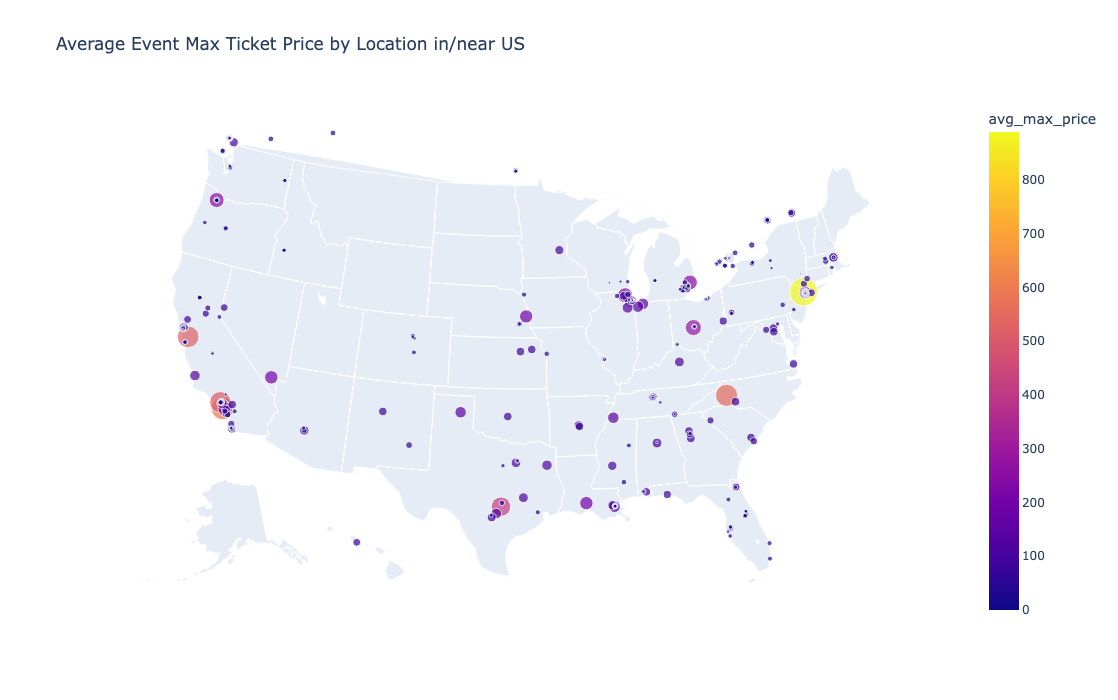

In [67]:
#Heat map of prices in US (using average max price by lat-long)

loc_avg_price_clean = loc_avg_price.dropna(subset=["avg_max_price"]) #drop nan values 

fig = px.scatter_geo(loc_avg_price_clean,
                     lat="lat", lon="lon",
                     color="avg_max_price", size="avg_max_price",
                     scope="usa",
                     title="Average Event Max Ticket Price by Location in/near US",
                     color_continuous_scale="Plasma",
                     width=1000,
                     height=700,
                     hover_data={
                     "avg_max_price":":.2f",  # 2 decimal places
                     "lat":":.2f",
                     "lon":":.2f"})

fig.show()


**Prices by venue**

In [55]:
#Venues with highest avg price
loc_avg_price.sort_values('avg_min_price', ascending=False).head(20)

,venue_id,venue_name,city,state,lat,lon,avg_max_price,avg_min_price
11,rZ7HnEZ17kaA0,Hard Rock Live Las Vegas,Las Vegas,Nevada,36.161629,-115.145576,201.791667,201.791667
12,rZ7HnEZ178s4g,Blue Moon Saloon,Lafayette,Louisiana,30.220444,-92.016281,199.000000,199.000000
14,rZ7HnEZ17fpJA,Ellen's Stardust Diner,New York,New York,40.762031,-73.983295,164.372791,137.916047
16,rZ7HnEZ17qoqf,Red Deer Resort & Casino Event Ctr,Red Deer,Alberta,52.252731,-113.814827,153.770000,110.670000
37,rZ7HnEZ17ao8f,Feinstein's at The Nikko,San Francisco,California,37.786022,-122.409225,96.110690,96.110690
39,rZ7HnEZa7N9,Scullers Jazz Club,Boston,Massachusetts,42.362857,-71.118134,94.530000,92.570000
36,rZ7HnEZ17qFOf,Regattabar,Cambridge,Massachusetts,42.372490,-71.123020,96.772759,92.357586
13,rZ7HnEZ173eZ4,Barnato,Omaha,Nebraska,41.257630,-96.172810,195.814000,82.180000
53,rZ7HnEZ17oSOg,Prairie Band Casino and Resort,Mayetta,Kansas,39.318173,-95.738417,81.300000,81.300000
64,rZ7HnEZ17F9ff,Place Des Arts,Montreal,Quebec,45.508541,-73.566677,80.070000,80.070000


**Prices by artist**

In [70]:
price_artist = pd.read_sql('''
    SELECT p.min_price, AVG(p.max_price) as avg_max_price, p.currency, e.event_id, a.artist_id, a.artist_name FROM event_price_history p
    JOIN events e ON p.event_id=e.event_id
    JOIN artists a ON e.artist_id=a.artist_id
    WHERE p.max_price IS NOT NULL
    GROUP BY a.artist_id
    HAVING avg_max_price < 2000 --exclude outlier
    ORDER BY avg_max_price DESC
''', conn)
price_artist.head(10)

,min_price,avg_max_price,currency,event_id,artist_id,artist_name
0,61.80,679.240000,USD,rZ7HnEZ1AK0317,K8vZ917Ckf7,Lorrie Morgan and Pam Tillis
1,23.35,622.000000,USD,rZ7HnEZ1AfbJ_K,K8vZ91712BV,Trixter
2,27.74,520.850000,USD,rZ7HnEZ1AKx6r7,K8vZ917QxD7,200 Stab Wounds
3,31.34,520.850000,USD,rZ7HnEZ1AffO7K,K8vZ9175xWf,Nekromantix
4,25.68,520.850000,USD,rZ7HnEZ1AKx6O0,K8vZ9172VY0,Crobot
5,54.05,490.066000,USD,rZ7HnEZ1AfafvK,K8vZ9171Cw7,Dokken
6,53.74,344.200000,USD,rZ7HnEZ1Af4tPd,K8vZ91713DV,Alejandro Escovedo
7,24.12,334.977778,USD,rZ7HnEZ1Af378d,K8vZ917pgnf,Dead Boys
8,100.31,275.205000,USD,rZ7HnEZ1AK-EZV,K8vZ9171yZ7,Chris Botti
9,99.19,264.910000,USD,rZ7HnEZ1AKPkxf,K8vZ9171_If,Galactic


In [57]:
price_artist = pd.read_sql('''
    SELECT p.min_price, AVG(p.min_price) as avg_min_price, p.currency, e.event_id, a.artist_id, a.artist_name FROM event_price_history p
    JOIN events e ON p.event_id=e.event_id
    JOIN artists a ON e.artist_id=a.artist_id
    WHERE p.max_price IS NOT NULL
    GROUP BY a.artist_id
    ORDER BY avg_min_price DESC
''', conn)
price_artist.head(10)

,min_price,avg_min_price,currency,event_id,artist_id,artist_name
0,162.50,162.500,USD,rZ7HnEZ1AfbbAS,K8vZ917fW-V,Honk
1,145.04,145.040,USD,rZ7HnEZ1Afbw-d,K8vZ917K270,Paul Cauthen
2,132.32,132.320,USD,rZ7HnEZ1AKq_O0,K8vZ9171aVf,Kenny G
3,111.62,129.080,USD,rZ7HnEZ1Af4pOd,K8vZ917ugOf,Catherine Russell
4,110.67,110.670,CAD,rZ7HnEZ1AfbI8N,K8vZ9175s2V,Harlequin
5,99.19,99.190,USD,rZ7HnEZ1AKPkxf,K8vZ9171_If,Galactic
6,98.20,98.200,USD,rZ7HnEZ1Af_vud,K8vZ917GEzV,Tainted Love
7,100.31,95.778,USD,rZ7HnEZ1AK-EZV,K8vZ9171yZ7,Chris Botti
8,90.65,90.650,USD,rZ7HnEZ1AfuSbN,K8vZ917Gbl7,Richie Kotzen
9,84.47,84.470,USD,rZ7HnEZ1AKPJJf,K8vZ9171uLf,Rickie Lee Jones


In [45]:
price_artist = pd.read_sql('''
    SELECT 
        a.artist_id,
        a.artist_name,
        AVG(p.min_price) AS avg_min_price
    FROM event_price_history p
    JOIN events e ON p.event_id = e.event_id
    JOIN artists a ON e.artist_id = a.artist_id
    WHERE p.max_price IS NOT NULL
      AND p.min_price IS NOT NULL
    GROUP BY a.artist_id, a.artist_name
    ORDER BY avg_min_price DESC
''', conn)

price_artist.head(20)

,artist_id,artist_name,avg_min_price
0,K8vZ917fW-V,Honk,162.500
1,K8vZ917K270,Paul Cauthen,145.040
2,K8vZ9171aVf,Kenny G,132.320
3,K8vZ917ugOf,Catherine Russell,129.080
4,K8vZ9175s2V,Harlequin,110.670
5,K8vZ9171_If,Galactic,99.190
6,K8vZ917GEzV,Tainted Love,98.200
7,K8vZ9171yZ7,Chris Botti,95.778
8,K8vZ917Gbl7,Richie Kotzen,90.650
9,K8vZ9171uLf,Rickie Lee Jones,84.470


**Prices by city**

In [65]:
#Cities with the highest average price
city_price = pd.read_sql('''
    SELECT p.event_id, AVG(p.max_price) AS avg_max_price, v.venue_id, v.city, v.state, v.country from event_price_history p
    JOIN events e on p.event_id = e.event_id 
    JOIN venues v on e.venue_id = v.venue_id
    GROUP BY v.city, v.state, v.country
    ORDER BY avg_max_price DESC
''', conn)

city_price.head(20)

,event_id,avg_max_price,venue_id,city,state,country
0,rZ7HnEZ1Afp7_K,888.924286,rZ7HnEZ17_SFS,Rutherford,New Jersey,United States Of America
1,vvG1iZbVJY6oqO,580.775172,KovZpZAJvnvA,Long Beach,California,United States Of America
2,rZ7HnEZ1AfbJ_K,547.090909,rZ7HnEZ17fEAP,Hickory,North Carolina,United States Of America
3,rZ7HnEZ1AKP_Cf,520.850000,rZ7HnEZ17oO1A,San Jose,California,United States Of America
4,Z7r9jZ1A7jk8I,507.416129,ZFr9jZeFAd,West Hollywood,California,United States Of America
5,rZ7HnEZ1Af4y1d,419.656667,rZ7HnEZ17Q94S,Buda,Texas,United States Of America
6,rZ7HnEZ1Afb-qN,249.500000,rZ7HnEZ1736rA,Island Lake,Illinois,United States Of America
7,rZ7HnEZ1AfpKFN,241.760000,rZ7HnEZaeHB,Mount Clemens,Michigan,United States Of America
8,rZ7HnEZ1AKxfef,230.773571,rZ7HnEZ178Ve4,Garden Grove,California,United States Of America
9,1AvjZbsGkz5-MWf,201.791667,KovZpZA7klAA,Las Vegas,Nevada,United States Of America


**Prices by genre**

In [92]:
genre_price = pd.read_sql('''
    SELECT AVG(p.min_price) AS avg_min_price, e.genre from event_price_history p
    JOIN events e ON p.event_id=e.event_id
    WHERE e.genre <> 'None'
    GROUP BY e.genre
    HAVING avg_min_price IS NOT null
    ORDER BY avg_min_price DESC
''', conn)
#Using average min price here

genre_price.head(10)

,avg_min_price,genre
0,47.863765,Jazz
1,39.475648,World
2,38.351553,R&B
3,36.983966,Religious
4,32.536008,Dance/Electronic
5,31.712789,Other
6,29.340000,Comedy
7,29.070219,Rock
8,26.812162,Reggae
9,26.390590,Hip-Hop/Rap


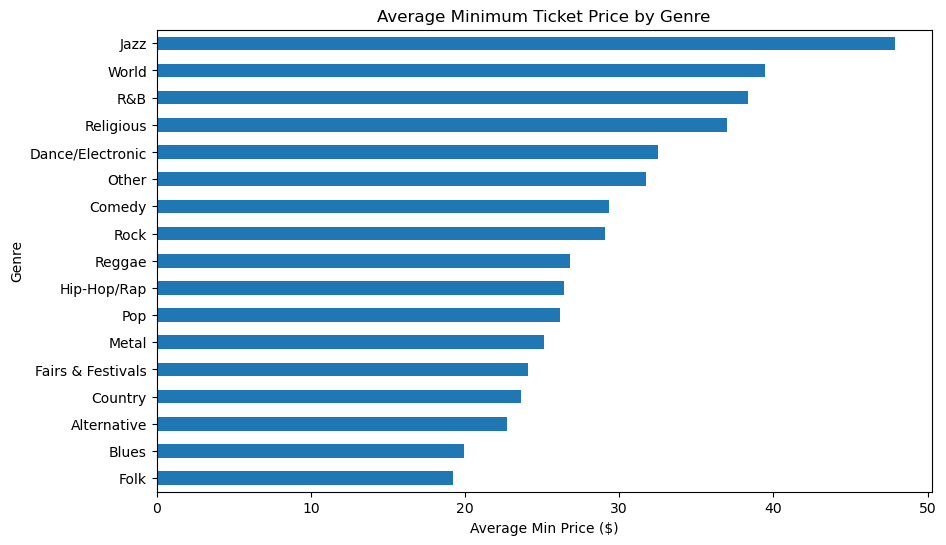

In [98]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Sort by avg_min_price descending
genre_price_sorted = genre_price.sort_values("avg_min_price", ascending=True)  # ascending=True for barh (top = highest)

genre_price_sorted.plot(kind="barh", 
                        x="genre", y="avg_min_price", 
                        legend=False, figsize=(10,6))

plt.title("Average Minimum Ticket Price by Genre")
plt.xlabel("Average Min Price ($)")
plt.ylabel("Genre")
plt.show()